<a href="https://colab.research.google.com/github/rosiekwon/smart_healthcare/blob/main/WEEK%204/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

##1. Import Fashion MNIST Dataset 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
#load_data()함수 호출 시 numpy 배열로 반환
(train_images, train_labels), (test_images,test_labels)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','shirt','Sneaker','Bag','Ankle boot']

## 2. Explore Data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

## 3. Data Preprocessing

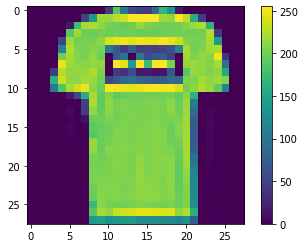

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()
#픽셀의 범위가 0~255사이라는 것을 알 수 있음

In [8]:
#범위를 0~1 사이로 조정
train_images = train_images/255.0
test_images = test_images/255.0

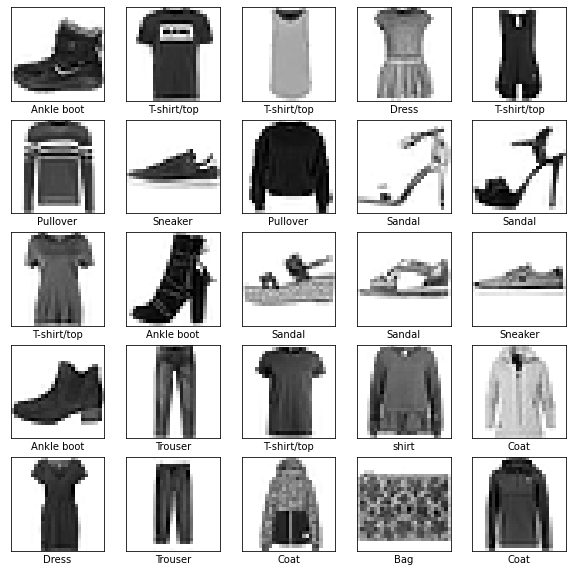

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


## 4. Modeling

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(10) #class 수와 동일하게
                             ])

첫 번째 층 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환하여 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.

두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결됩니다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 첫 번째 `Dense` 층은 128개의 노드(또는 뉴런)를 가집니다. 두 번째 (마지막) 층은 10개의 노드의 *소프트맥스*(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다

### Compile model

* Loss
* Optimizer
* metrics

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

## 5. Train Model

In [12]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4976 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3763 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3353 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3112 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2939 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2671 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2575 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2468 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

## 6. Model accuracy

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\ntest accuracy', test_acc)

313/313 - 1s - loss: 0.3512 - accuracy: 0.8779 - 615ms/epoch - 2ms/step

test accuracy 0.8779000043869019


테스트 세트의 정확도가 훈련세트 정확도 보다 조금 낮다. 훈련세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과적합때문이다

## 7. Prediction

In [14]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [16]:
predictions[0]

array([4.9227187e-06, 6.8271234e-08, 4.0886183e-10, 1.1390297e-10,
       4.9804843e-08, 4.3494478e-03, 3.0084644e-07, 5.7141692e-03,
       2.7716899e-06, 9.8992831e-01], dtype=float32)

이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 

In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

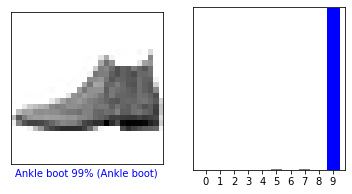

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)
plt.show()

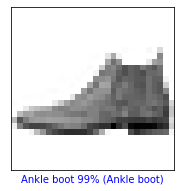

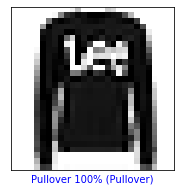

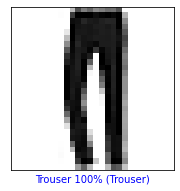

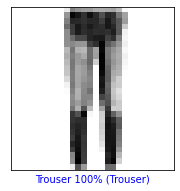

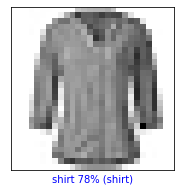

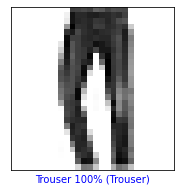

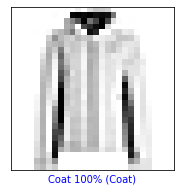

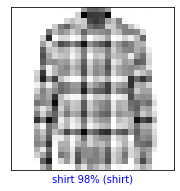

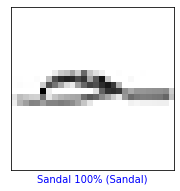

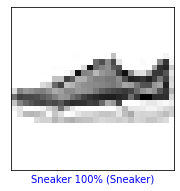

In [19]:
for i in range (10):
  plt.figure(figsize=(6,3))
  plot_image(i, predictions[i], test_labels, test_images)
plt.show()